In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [108]:
test_df = pd.read_csv('C:/Users/Kalpesh__K__/Datasets/test.csv')


In [109]:
test_df.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
5,2012-01-08,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,JPMorgan Chase & Co.,MI,48836,NaN,NaN,Web,2012-01-09,Closed without relief,Yes,11475
6,2015-12-19,Credit reporting,NaN,Incorrect information on credit report,Personal information,I have contacted Experian and told them to rem...,Company chooses not to provide a public response,Experian,GA,309XX,NaN,Consent provided,Web,2015-12-19,Closed with non-monetary relief,Yes,1708256
7,2013-06-28,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"TransUnion Intermediate Holdings, Inc.",FL,33070,NaN,NaN,Postal mail,2013-07-01,Closed with explanation,Yes,445895
8,2014-07-16,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Citibank,CA,94070,NaN,NaN,Web,2014-07-22,Closed with explanation,Yes,940573
9,2014-07-29,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"The CBE Group, Inc.",IA,50315,NaN,NaN,Web,2014-07-29,Closed with explanation,Yes,959328


In [110]:
test_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [111]:
test_df.shape

(119606, 17)

In [112]:
train_df =  pd.read_csv('C:/Users/Kalpesh__K__/Datasets/train.csv')


In [113]:
train_df.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
5,2014-01-10,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,TD Bank US Holding Company,FL,33180,NaN,NaN,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
6,2016-02-03,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,Homeowner applied for 2nd modification due to ...,NaN,Ocwen,NJ,071XX,NaN,Consent provided,Web,2016-02-03,Closed with explanation,Yes,No,1771444
7,2015-12-07,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,IL,60610,NaN,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
8,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,"Citizens Financial Group, Inc.",PA,18337,NaN,NaN,Web,2012-04-05,Closed with relief,Yes,Yes,44225
9,2015-08-13,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes the complaint is the result o...,Grant & Weber,CA,91302,NaN,Consent not provided,Web,2015-08-20,Closed with explanation,Yes,No,1518460


In [114]:
test_df.describe()

,Complaint ID
count,1.196060e+05
mean,1.043759e+06
std,5.937896e+05
min,7.000000e+00
25%,5.331275e+05
50%,1.065378e+06
75%,1.557638e+06
max,2.128060e+06


In [115]:
train_df.shape

(358810, 18)

In [116]:
# find missing values in train data
missing_train = train_df.isnull().sum()
# calculate percentage of missing values in train data
percent_missing_train = (missing_train / len(train_df)) * 100
# combine missing values and percentages into a dataframe
missing_percent_train = pd.concat([missing_train, percent_missing_train], axis=1, keys=['Missing', 'Percent'])
# display columns with missing values greater than 25%
missing_percent_train[missing_percent_train['Percent'] > 25]

# find missing values in test data
missing_test = test_df.isnull().sum()
# calculate percentage of missing values in test data
percent_missing_test = (missing_test / len(test_df)) * 100
# combine missing values and percentages into a dataframe
missing_percent_test = pd.concat([missing_test, percent_missing_test], axis=1, keys=['Missing', 'Percent'])
# display columns with missing values greater than 25%
missing_percent_test[missing_percent_test['Percent'] > 25]

# drop columns with missing values greater than 25%
train_df.dropna(thresh=len(train_df)*0.75, axis=1, inplace=True)
test_df.dropna(thresh=len(test_df)*0.75, axis=1, inplace=True)


In [117]:
train_df

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


In [118]:
test_df

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765


In [119]:
train_df.describe()

,Complaint ID
count,3.588100e+05
mean,1.043850e+06
std,5.945511e+05
min,5.000000e+00
25%,5.339312e+05
50%,1.064641e+06
75%,1.561380e+06
max,2.126221e+06


In [120]:
# extract day, month, and year from date received column in train data
train_df['Day_Received'] = pd.to_datetime(train_df['Date received']).dt.day
train_df['Month_Received'] = pd.to_datetime(train_df['Date received']).dt.month
train_df['Year_Received'] = pd.to_datetime(train_df['Date received']).dt.year

# extract day, month, and year from date received column in test data
test_df['Day_Received'] = pd.to_datetime(test_df['Date received']).dt.day
test_df['Month_Received'] = pd.to_datetime(test_df['Date received']).dt.month
test_df['Year_Received'] = pd.to_datetime(test_df['Date received']).dt.year


In [121]:
train_df.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day_Received,Month_Received,Year_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015


In [122]:
test_df.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day_Received,Month_Received,Year_Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,17,1,2015
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,22,6,2016
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,4,9,2015
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,17,5,2016
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016


In [123]:
# calculate the number of days the complaint was with the company in train data
train_df['Days held'] = (pd.to_datetime(train_df['Date sent to company']) - pd.to_datetime(train_df['Date received'])).dt.days

# calculate the number of days the complaint was with the company in test data
test_df['Days held'] = (pd.to_datetime(test_df['Date sent to company']) - pd.to_datetime(test_df['Date received'])).dt.days


In [124]:
train_df.head(20)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day_Received,Month_Received,Year_Received,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015,0
5,2014-01-10,Credit card,APR or interest rate,TD Bank US Holding Company,FL,33180,Web,2014-01-15,Closed with explanation,Yes,Yes,663281,10,1,2014,5
6,2016-02-03,Mortgage,"Loan modification,collection,foreclosure",Ocwen,NJ,071XX,Web,2016-02-03,Closed with explanation,Yes,No,1771444,3,2,2016,0
7,2015-12-07,Credit card,Payoff process,Capital One,IL,60610,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130,7,12,2015,0
8,2012-04-05,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,18337,Web,2012-04-05,Closed with relief,Yes,Yes,44225,5,4,2012,0
9,2015-08-13,Debt collection,Cont'd attempts collect debt not owed,Grant & Weber,CA,91302,Web,2015-08-20,Closed with explanation,Yes,No,1518460,13,8,2015,7


In [125]:
train_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Day_Received', 'Month_Received', 'Year_Received', 'Days held'],
      dtype='object')

In [126]:
test_df.head(20)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day_Received,Month_Received,Year_Received,Days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,17,1,2015,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,22,6,2016,0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,4,9,2015,0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,17,5,2016,3
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016,0
5,2012-01-08,Mortgage,"Loan servicing, payments, escrow account",JPMorgan Chase & Co.,MI,48836,Web,2012-01-09,Closed without relief,Yes,11475,8,1,2012,1
6,2015-12-19,Credit reporting,Incorrect information on credit report,Experian,GA,309XX,Web,2015-12-19,Closed with non-monetary relief,Yes,1708256,19,12,2015,0
7,2013-06-28,Credit reporting,Incorrect information on credit report,"TransUnion Intermediate Holdings, Inc.",FL,33070,Postal mail,2013-07-01,Closed with explanation,Yes,445895,28,6,2013,3
8,2014-07-16,Mortgage,"Loan servicing, payments, escrow account",Citibank,CA,94070,Web,2014-07-22,Closed with explanation,Yes,940573,16,7,2014,6
9,2014-07-29,Debt collection,Disclosure verification of debt,"The CBE Group, Inc.",IA,50315,Web,2014-07-29,Closed with explanation,Yes,959328,29,7,2014,0


In [127]:
# import the pandas module
import pandas as pd

# create a variable to store the current date
current_date = pd.Timestamp.now()

# convert the "Date Received" column to pandas datetime column
train_df['Date received'] = pd.to_datetime(train_df['Date received'])
test_df['Date received'] = pd.to_datetime(test_df['Date received'])

# create new column "Days held" in train data
train_df['Days held'] = (current_date - train_df['Date received']).dt.days

# create new column "Week_Received" in train data
train_df['Week_Received'] = (train_df['Days held'] // 7) + 1

# create new column "Days held" in test data
test_df['Days held'] = (current_date - test_df['Date received']).dt.days

# create new column "Week_Received" in test data
test_df['Week_Received'] = (test_df['Days held'] // 7) + 1


In [128]:
train_df.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day_Received,Month_Received,Year_Received,Days held,Week_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015,2698,386
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015,2869,410
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013,3361,481
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016,2557,366
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015,2955,423


In [129]:
train_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Day_Received', 'Month_Received', 'Year_Received', 'Days held',
       'Week_Received'],
      dtype='object')

In [208]:


# Extract year from Date Received column
#train_df['Year_received'] = train_df['Date received'].dt.year

# Group by year and calculate total disputes
#yearly_disputes = train_df.groupby('Year_Received')['Consumer disputed?'].sum()

# Plot bar graph using seaborn
#sns.set_style("whitegrid")
#sns.barplot(x=yearly_disputes.index, y=yearly_disputes.values)
#plt.title('Total Number of Disputes Over Year Wise Disputes')
#plt.xlabel('Year')
#plt.ylabel('Total Number of Disputes')
#plt.show()


In [131]:
# drop unnecessary columns in train data
train_df.drop(['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], axis=1, inplace=True)

# drop unnecessary columns in test data
test_df.drop(['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], axis=1, inplace=True)


In [132]:
train_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day_Received', 'Month_Received', 'Year_Received',
       'Days held', 'Week_Received', 'Year_received'],
      dtype='object')

In [133]:
# impute null values in "State" column with mode in train data
train_df['State'].fillna(train_df['State'].mode()[0], inplace=True)

# impute null values in "State" column with mode in test data
test_df['State'].fillna(test_df['State'].mode()[0], inplace=True)


In [134]:
train_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day_Received', 'Month_Received', 'Year_Received',
       'Days held', 'Week_Received', 'Year_received'],
      dtype='object')

In [135]:
# create a new variable to store disputed customers
disputed_cons = train_df[train_df['Consumer disputed?'] == 'Yes']


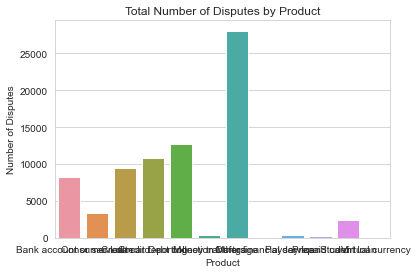

In [136]:
# Count the number of disputes in each product category
dispute_counts = train_df[train_df['Consumer disputed?'] == 'Yes'].groupby('Product').size().reset_index(name='Dispute Count')

# Create the bar plot using Seaborn
sns.barplot(x='Product', y='Dispute Count', data=dispute_counts)

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes by Product')
plt.show()

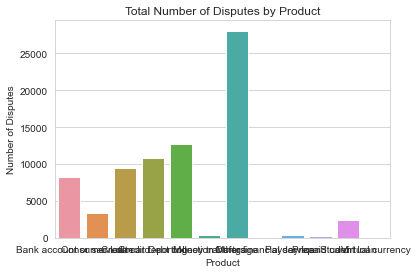

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of disputes in each product category
dispute_counts = train_df[train_df['Consumer disputed?'] == 'Yes'].groupby('Product').size().reset_index(name='Dispute Count')

# Create the bar plot using Seaborn
sns.barplot(x='Product', y='Dispute Count', data=dispute_counts)

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes by Product')
plt.show()


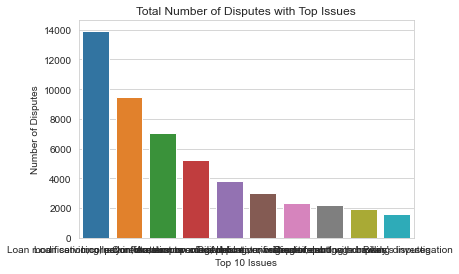

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 issues by number of disputes
top_issues = train_df[train_df['Consumer disputed?'] == 'Yes'].groupby('Issue').size().reset_index(name='Dispute Count').nlargest(10, 'Dispute Count')

# Create the bar plot using Seaborn
sns.barplot(x='Issue', y='Dispute Count', data=top_issues)

# Add labels and title
plt.xlabel('Top 10 Issues')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes with Top Issues')
plt.show()


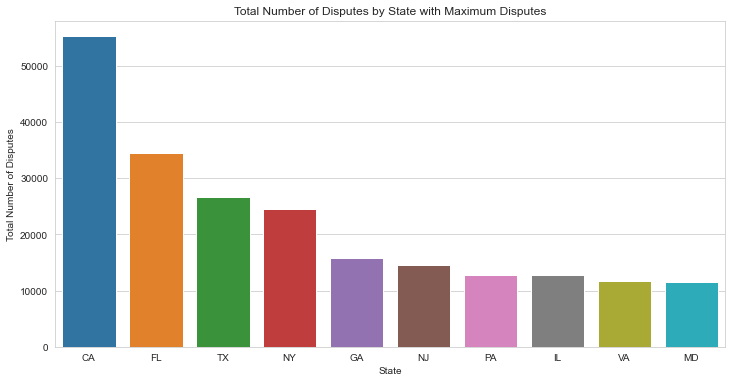

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by state and count the number of disputed cases in each state
disputes_by_state = train_df.groupby('State')['Consumer disputed?'].count().reset_index()

# Sort the values in descending order based on the count of disputes
disputes_by_state = disputes_by_state.sort_values(by='Consumer disputed?', ascending=False)

# Select the top 10 states with the highest number of disputes
top_states = disputes_by_state.head(10)

# Plot a bar graph using seaborn library
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Consumer disputed?', data=top_states)
plt.title('Total Number of Disputes by State with Maximum Disputes')
plt.xlabel('State')
plt.ylabel('Total Number of Disputes')
plt.show()


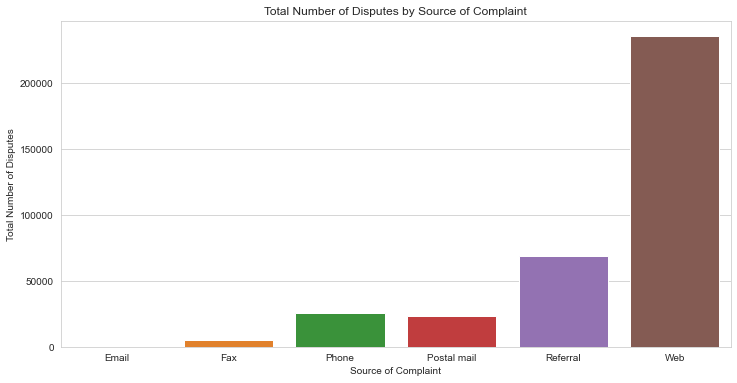

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by the source of complaint and count the number of disputed cases for each source
disputes_by_source = train_df.groupby('Submitted via')['Consumer disputed?'].count().reset_index()

# Plot a bar graph using seaborn library
plt.figure(figsize=(12, 6))
sns.barplot(x='Submitted via', y='Consumer disputed?', data=disputes_by_source)
plt.title('Total Number of Disputes by Source of Complaint')
plt.xlabel('Source of Complaint')
plt.ylabel('Total Number of Disputes')
plt.show()


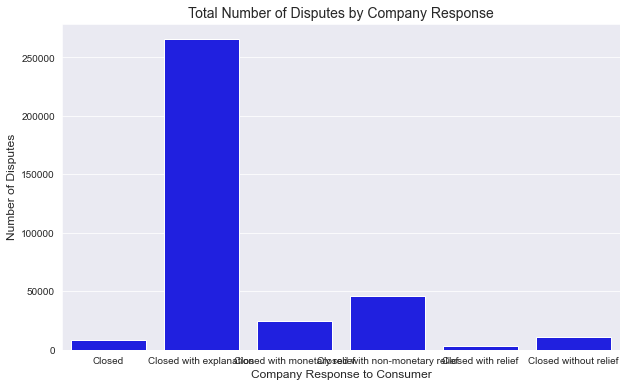

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of disputes for each company response
response_counts = train_df.groupby('Company response to consumer')['Consumer disputed?'].count()

# Plot the bar graph using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=response_counts.index, y=response_counts.values, color='b')
ax.set_title('Total Number of Disputes by Company Response', fontsize=14)
ax.set_xlabel('Company Response to Consumer', fontsize=12)
ax.set_ylabel('Number of Disputes', fontsize=12)

plt.show()


In [142]:
train_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day_Received', 'Month_Received', 'Year_Received',
       'Days held', 'Week_Received', 'Year_received'],
      dtype='object')

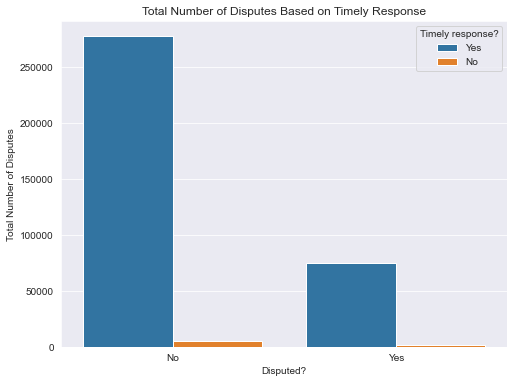

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='Consumer disputed?', hue='Timely response?')
plt.title('Total Number of Disputes Based on Timely Response')
plt.xlabel('Disputed?')
plt.ylabel('Total Number of Disputes')
plt.show()


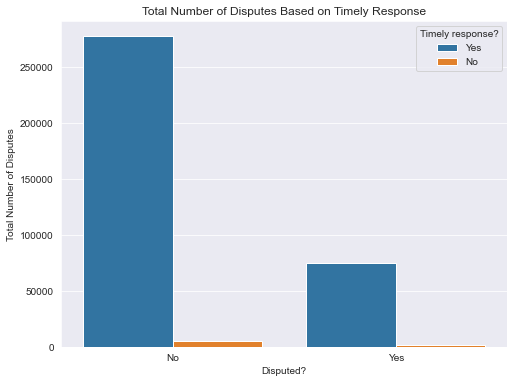

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='Consumer disputed?', hue='Timely response?')
plt.title('Total Number of Disputes Based on Timely Response')
plt.xlabel('Disputed?')
plt.ylabel('Total Number of Disputes')
plt.show()


In [145]:
#Converte all negative days held to zero(it is the time taken by the authority that can't be negative)

train_df['Days held'] = train_df['Days held'].apply(lambda x: max(0, x))


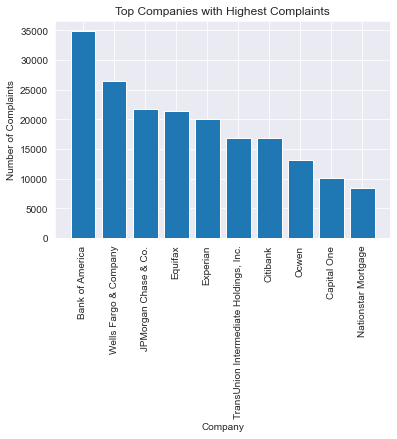

In [146]:


# load the dataset
df = pd.read_csv("C:/Users/Kalpesh__K__/Datasets/train.csv")

# group the data by company and count the number of complaints
company_complaints = df.groupby('Company').size().sort_values(ascending=False)[:10]

# create a bar plot
plt.bar(company_complaints.index, company_complaints.values)

# set the title and labels for the plot
plt.title('Top Companies with Highest Complaints')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# display the plot
plt.show()


In [147]:
train_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day_Received', 'Month_Received', 'Year_Received',
       'Days held', 'Week_Received', 'Year_received'],
      dtype='object')

In [148]:
test_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Day_Received',
       'Month_Received', 'Year_Received', 'Days held', 'Week_Received'],
      dtype='object')

In [149]:
test_df.drop(['Company', 'State', 'Year_Received', 'Days held'], axis=1, inplace=True)


In [150]:
test_df.columns

Index(['Product', 'Issue', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Day_Received', 'Month_Received', 'Week_Received'],
      dtype='object')

In [151]:
# Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)
train_df['Consumer disputed?'] = train_df['Consumer disputed?'].map({'Yes': 1, 'No': 0})


In [152]:
train_df.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day_Received,Month_Received,Year_Received,Days held,Week_Received,Year_received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,0,14,10,2015,2698,386,2015
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,1,26,4,2015,2869,410,2015
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,0,20,12,2013,3361,481,2013
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,0,3,3,2016,2557,366,2016
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,1,30,1,2015,2955,423,2015


In [153]:
# Create Dummy Variables for categoricalfeaturesand concat with the original data framelike: 'Product,’'Submitted via,’'Company response to consumer,’'Timely response?'•



In [154]:
# create dummy variables for categorical features
dummy_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_dummies = pd.get_dummies(train_df[dummy_cols], drop_first=True)

# concatenate with the original dataframe
df = pd.concat([train_df.drop(dummy_cols, axis=1), df_dummies], axis=1)


In [155]:
train_df.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day_Received', 'Month_Received', 'Year_Received',
       'Days held', 'Week_Received', 'Year_received'],
      dtype='object')

In [156]:
df_encoded = pd.get_dummies(train_df, columns=['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'])


In [157]:
train_df.dtypes

Product                         object
Issue                           object
Company                         object
State                           object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Consumer disputed?               int64
Day_Received                     int64
Month_Received                   int64
Year_Received                    int64
Days held                        int64
Week_Received                    int64
Year_received                    int64
dtype: object

In [158]:
train_df.dtypes disputed

Product                         object
Issue                           object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Day_Received                     int64
Month_Received                   int64
Week_Received                    int64
dtype: object

In [193]:
#train_df = train_df.drop(['Company', 'State', 'Year_Received', 'Days held'], axis=1)


In [196]:
train_df.columns

Index(['Issue', 'Day_Received', 'Month_Received', 'Week_Received',
       'Year_received', 'Product_0', 'Product_1', 'Product_2', 'Product_3',
       'Product_4', 'Product_5', 'Product_6', 'Product_7', 'Product_8',
       'Product_9', 'Product_10', 'Product_11', 'Submitted via_0',
       'Submitted via_1', 'Submitted via_2', 'Submitted via_3',
       'Submitted via_4', 'Submitted via_5', 'Company response to consumer_0',
       'Company response to consumer_1', 'Company response to consumer_2',
       'Company response to consumer_3', 'Company response to consumer_4',
       'Company response to consumer_5', 'Timely response?_0',
       'Timely response?_1', 'Consumer disputed?_0', 'Consumer disputed?_1'],
      dtype='object')

In [198]:
train_df =  pd.read_csv('C:/Users/Kalpesh__K__/Datasets/train.csv')


In [201]:
test_df =  pd.read_csv('C:/Users/Kalpesh__K__/Datasets/test.csv')


In [202]:
# find missing values in train data
missing_train = train_df.isnull().sum()
# calculate percentage of missing values in train data
percent_missing_train = (missing_train / len(train_df)) * 100
# combine missing values and percentages into a dataframe
missing_percent_train = pd.concat([missing_train, percent_missing_train], axis=1, keys=['Missing', 'Percent'])
# display columns with missing values greater than 25%
missing_percent_train[missing_percent_train['Percent'] > 25]

# find missing values in test data
missing_test = test_df.isnull().sum()
# calculate percentage of missing values in test data
percent_missing_test = (missing_test / len(test_df)) * 100
# combine missing values and percentages into a dataframe
missing_percent_test = pd.concat([missing_test, percent_missing_test], axis=1, keys=['Missing', 'Percent'])
# display columns with missing values greater than 25%
missing_percent_test[missing_percent_test['Percent'] > 25]

# drop columns with missing values greater than 25%
train_df.dropna(thresh=len(train_df)*0.75, axis=1, inplace=True)
test_df.dropna(thresh=len(test_df)*0.75, axis=1, inplace=True)


In [205]:
# extract day, month, and year from date received column in train data
train_df['Day_Received'] = pd.to_datetime(train_df['Date received']).dt.day
train_df['Month_Received'] = pd.to_datetime(train_df['Date received']).dt.month
train_df['Year_Received'] = pd.to_datetime(train_df['Date received']).dt.year

# extract day, month, and year from date received column in test data
test_df['Day_Received'] = pd.to_datetime(test_df['Date received']).dt.day
test_df['Month_Received'] = pd.to_datetime(test_df['Date received']).dt.month
test_df['Year_Received'] = pd.to_datetime(test_df['Date received']).dt.year


In [206]:
train_df.columns


Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Day_Received', 'Month_Received', 'Year_Received'],
      dtype='object')

In [207]:
test_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Day_Received', 'Month_Received',
       'Year_Received'],
      dtype='object')

In [209]:
# calculate the number of days the complaint was with the company in train data
train_df['Days held'] = (pd.to_datetime(train_df['Date sent to company']) - pd.to_datetime(train_df['Date received'])).dt.days

# calculate the number of days the complaint was with the company in test data
test_df['Days held'] = (pd.to_datetime(test_df['Date sent to company']) - pd.to_datetime(test_df['Date received'])).dt.days


In [210]:
train_df.columns


Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Day_Received', 'Month_Received', 'Year_Received', 'Days held'],
      dtype='object')

In [212]:
train_df = train_df.drop(['Date received'], axis=1)


In [214]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# encode the 'Credit reporting' string value as 0 and all other values as 1
train_df['Product'] = le.fit_transform(train_df['Product'].apply(lambda x: x if x != 'Credit reporting' else 'Credit reporting_'))



In [216]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# apply Label Encoding to the categorical columns
train_df['Product'] = le.fit_transform(train_df['Product'])
train_df['Submitted via'] = le.fit_transform(train_df['Submitted via'])
train_df['Company response to consumer'] = le.fit_transform(train_df['Company response to consumer'])
train_df['Consumer disputed?'] = le.fit_transform(train_df['Consumer disputed?'])

# check the updated dataframe
train_df.head()


,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day_Received,Month_Received,Year_Received,Days held
0,3,Incorrect information on credit report,Equifax,GA,30134,5,2015-10-14,1,Yes,0,1605653,14,10,2015,0
1,0,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,5,2015-04-26,1,Yes,1,1347613,26,4,2015,0
2,2,Other,Citibank,SC,29203,2,2014-01-03,3,Yes,0,640394,20,12,2013,14
3,4,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,4,2016-03-04,1,Yes,0,1815134,3,3,2016,1
4,4,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,5,2015-01-30,1,Yes,1,1218613,30,1,2015,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [ ]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop the dependent variable from the data
X = df.drop('Consumer disputed?', axis=1)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for feature selection
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Splitting data into dependent and independent variables
X = df_pca.drop(['Consumer disputed?'], axis=1)
y = df_pca['Consumer disputed?']

# Scaling the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to select features up to 80% information
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initializing models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()

# Fitting models on train set
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predicting on test set
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_ada = ada.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Calculating accuracy scores
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_gb = accuracy_score(y_test, y_pred_gb)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("Logistic Regression accuracy:", acc_lr)
print("Decision Tree accuracy:", acc_dt)
print("Random Forest accuracy:", acc_rf)
print("AdaBoost accuracy:", acc_ada)
print("Gradient Boosting accuracy:", acc_gb)
print("K-Nearest Neighbors accuracy:", acc_knn)
print("XGBoost accuracy:", acc_xgb)
